# Remove Similar Training Images
- Go through all my training images and eliminate those that are too similar to have a more diverse training set and reduce the required memory

## Outcome
- 

In [1]:
%matplotlib inline
#from pylab import rcParams
#rcParams['figure.figsize'] = 12, 8

%load_ext autoreload
%autoreload 2

%load_ext version_information
%version_information numpy, scipy, matplotlib, pandas

Software versions
Python 2.7.13 64bit [GCC 4.2.1 Compatible Apple LLVM 8.0.0 (clang-800.0.42.1)]
IPython 5.3.0
OS Darwin 16.6.0 x86_64 i386 64bit
numpy 1.12.1
scipy 0.19.0
matplotlib 2.0.2
pandas 0.20.1
Tue May 30 16:49:32 2017 AEST

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import cv2
import glob
import copy
import random

import os
import sys

sys.path.append("../src")
from images_permute import processing_pipeline

np.random.seed(0)

def view(image):
    plt.figure()
    plt.axis('off')
    plt.imshow(image, cmap = cm.Greys_r)

In [3]:
list_image_directory_paths = glob.glob('/Users/jacksimpson/Data/beeunique/output/All/*/')
print(list_image_directory_paths[0], len(list_image_directory_paths))

('/Users/jacksimpson/Data/beeunique/output/All/0/', 64)


In [4]:
kernel_size = 3
sig = 1.0
th = 0.2
lm = 3.0
gm = 1.5
ps = 0

kernel = cv2.getGaborKernel((kernel_size, kernel_size), sig, th, lm, gm, ps)

In [5]:
class_images_dict = {}
for image_directory_path in list_image_directory_paths:
    image_class_name = os.path.basename(os.path.normpath(image_directory_path))
    print(image_class_name, image_directory_path)
    class_images_dict[image_class_name] = []
    
    image_subdirs = glob.glob(image_directory_path + '/*/')
    for subdir in image_subdirs:
        for image_file in glob.glob(subdir + '*.png'):
            image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
            
            
            image = cv2.medianBlur(image, 3);
            image = cv2.filter2D(image, cv2.CV_32F, kernel)
            
            
            
            
            class_images_dict[image_class_name].append(image)

('0', '/Users/jacksimpson/Data/beeunique/output/All/0/')
('1', '/Users/jacksimpson/Data/beeunique/output/All/1/')
('2', '/Users/jacksimpson/Data/beeunique/output/All/2/')
('3', '/Users/jacksimpson/Data/beeunique/output/All/3/')
('4', '/Users/jacksimpson/Data/beeunique/output/All/4/')
('5', '/Users/jacksimpson/Data/beeunique/output/All/5/')
('6', '/Users/jacksimpson/Data/beeunique/output/All/6/')
('7', '/Users/jacksimpson/Data/beeunique/output/All/7/')
('8', '/Users/jacksimpson/Data/beeunique/output/All/8/')
('a', '/Users/jacksimpson/Data/beeunique/output/All/a/')
('AA', '/Users/jacksimpson/Data/beeunique/output/All/AA/')
('Ampersand', '/Users/jacksimpson/Data/beeunique/output/All/Ampersand/')
('Ankh', '/Users/jacksimpson/Data/beeunique/output/All/Ankh/')
('ArrowLine', '/Users/jacksimpson/Data/beeunique/output/All/ArrowLine/')
('Asterisk', '/Users/jacksimpson/Data/beeunique/output/All/Asterisk/')
('b', '/Users/jacksimpson/Data/beeunique/output/All/b/')
('BB', '/Users/jacksimpson/Data/be

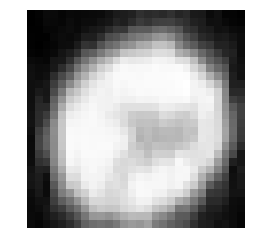

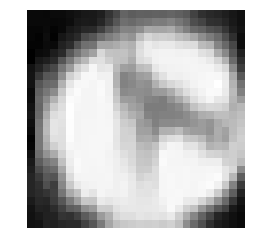

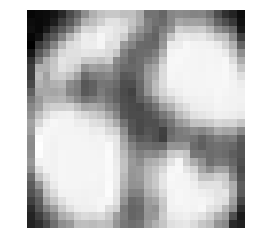

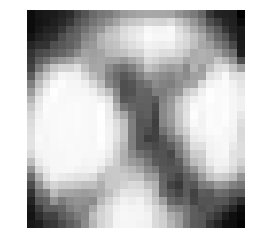

In [6]:
view(class_images_dict['AA'][0])
view(class_images_dict['AA'][-77])
view(class_images_dict['XX'][0])
view(class_images_dict['XX'][1])

In [7]:
print({k: len(class_images_dict[k]) for k in class_images_dict.keys()})
n = 0
m = 100000
m_class_name = ''
for k in class_images_dict.keys():
    if m > len(class_images_dict[k]):
        m = len(class_images_dict[k])
        m_class_name = k
    n += len(class_images_dict[k])
print(n, m, m_class_name)

{'HollowArrow': 12542, 'Leaf': 18795, 'BB': 22702, 'Note1': 19408, 'DD': 18647, 'Peace': 11981, 'Question': 14189, 'Pillars': 21214, 'KK': 10797, 'HH': 7438, 'Ampersand': 30333, 'JJ': 20185, 'Notes2': 5503, 'Plant': 28820, 'Triangle': 15329, 'Power': 13586, 'Ankh': 12257, 'TT': 12068, 'Trident': 17598, 'Asterisk': 55154, 'Lines3': 7687, '1': 28267, '0': 10677, '3': 20854, '2': 20616, '5': 12025, '4': 12802, '7': 22481, '6': 10447, '8': 13133, 'Omega': 14831, 'CircleCross': 18354, 'AA': 22210, 'Circle_Line': 12247, 'Radioactive': 11782, 'EE': 8123, 'PP': 14941, 'GG': 13412, 'XX': 9631, 'Plane': 4561, 'ZZ': 41249, 'Necklace': 37106, 'Umbrella': 12740, 'Dot': 12951, 'Halfcircle': 21597, 'a': 9016, 'Heart': 30117, 'b': 17262, 'e': 21883, 'RR': 25155, 'g': 16371, 'f': 15362, 'UU': 11717, 'h': 9803, 'Queen': 21978, 'Tadpole': 24269, 'n': 18065, 'SS': 14522, 'r': 18146, 'ArrowLine': 3881, 'w': 12725, 'y': 7183, 'Scissors': 17618, 'MM': 15126}
(1093469, 3881, 'ArrowLine')


In [8]:
subset_class_images_dict = {}

for tag_class in class_images_dict.keys():
    if len(class_images_dict[tag_class]) > 4000:
        subset_class_images_dict[tag_class] = random.sample(class_images_dict[tag_class], 4000)
    else:
        subset_class_images_dict[tag_class] = class_images_dict[tag_class]

print({k: len(subset_class_images_dict[k]) for k in subset_class_images_dict.keys()})

{'HollowArrow': 4000, 'Leaf': 4000, 'BB': 4000, 'Note1': 4000, 'DD': 4000, 'Peace': 4000, 'Question': 4000, 'Pillars': 4000, 'HH': 4000, 'Ampersand': 4000, 'JJ': 4000, 'Notes2': 4000, 'Plant': 4000, 'Triangle': 4000, 'Power': 4000, 'Ankh': 4000, 'TT': 4000, 'Trident': 4000, 'Asterisk': 4000, 'Lines3': 4000, '1': 4000, '0': 4000, '3': 4000, '2': 4000, '5': 4000, '4': 4000, '7': 4000, '6': 4000, '8': 4000, 'Omega': 4000, 'CircleCross': 4000, 'AA': 4000, 'SS': 4000, 'Circle_Line': 4000, 'Radioactive': 4000, 'Tadpole': 4000, 'EE': 4000, 'RR': 4000, 'PP': 4000, 'GG': 4000, 'XX': 4000, 'ZZ': 4000, 'Necklace': 4000, 'Umbrella': 4000, 'Dot': 4000, 'a': 4000, 'Heart': 4000, 'b': 4000, 'e': 4000, 'Halfcircle': 4000, 'g': 4000, 'f': 4000, 'KK': 4000, 'h': 4000, 'Queen': 4000, 'Plane': 4000, 'n': 4000, 'UU': 4000, 'r': 4000, 'ArrowLine': 3881, 'w': 4000, 'y': 4000, 'Scissors': 4000, 'MM': 4000}


In [9]:
def norm_image(image):
    image[image < 0] = 0
    image[image > 255] = 255
    return np.uint8(image)

def add_noise(image, n_or_u):
    noise = np.zeros((28,28), np.uint8)
    if n_or_u == 'n':
        cv2.randn(noise, 30, 2)
    else:
        cv2.randu(noise, 20, 2)
    noisy_image = np.uint32(image) + noise
    noisy_image[noisy_image < 0] = 0
    noisy_image[noisy_image > 255] = 255
    noisy_image = np.uint8(noisy_image)
    return noisy_image

def rotate_image(image):
    rotated_images = []
    for angle in range(90, 360, 90):
        M = cv2.getRotationMatrix2D((14,14),angle,1)
        r = cv2.warpAffine(image,M,(28,28))
        rotated_images.append(r)
    return rotated_images

def change_brightness_contrast(image):
    image_int32 = np.int32(image)
    increase_brightness = norm_image(image_int32 + 80)
    decrease_brightness = norm_image(image_int32 - 80)
    return [increase_brightness, decrease_brightness]
    
def occlude_edges(image):
    full_size = np.zeros((28, 28), dtype=np.uint8)
    full_size[2:26, 2:26] = image[2:26, 2:26]
    return full_size

def mean_smooth(image):
    mean_smoothed = cv2.blur(image, (3, 3))
    return mean_smoothed

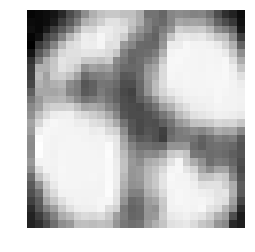

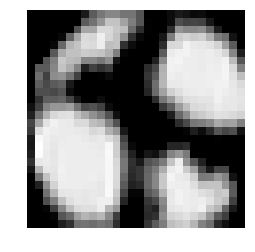

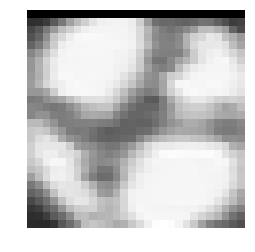

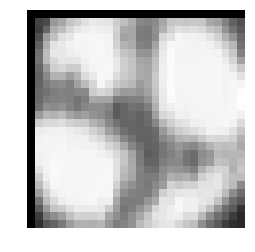

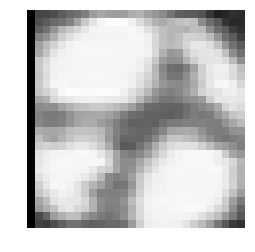

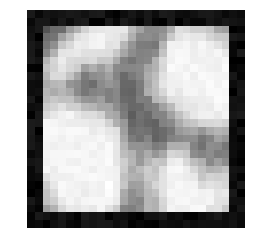

In [10]:
for im in change_brightness_contrast(class_images_dict['XX'][0]):
    view(im)
for im in rotate_image(class_images_dict['XX'][0]):
    view(im)
view(add_noise(occlude_edges(class_images_dict['XX'][0]), 'u'))

In [11]:
X = []
image_class_names_index = 0
image_class_names = {}
y = []

for tag_class in subset_class_images_dict.keys():
    print(tag_class, len(subset_class_images_dict[tag_class]))
    image_class_names[image_class_names_index] = tag_class
    for tag in subset_class_images_dict[tag_class]:
        generated_images = [tag, add_noise(occlude_edges(tag), 'u')]
        generated_images.extend(change_brightness_contrast(tag))
        generated_images.extend(rotate_image(tag))
        X.extend(generated_images)
        y.extend([image_class_names_index] * len(generated_images))
    image_class_names_index += 1
    
X = np.array(X)
y = np.array(y)

('HollowArrow', 4000)
('Leaf', 4000)
('BB', 4000)
('Note1', 4000)
('DD', 4000)
('Peace', 4000)
('Question', 4000)
('Pillars', 4000)
('KK', 4000)
('HH', 4000)
('Ampersand', 4000)
('JJ', 4000)
('Notes2', 4000)
('Plant', 4000)
('Triangle', 4000)
('Power', 4000)
('Ankh', 4000)
('TT', 4000)
('Trident', 4000)
('Asterisk', 4000)
('Lines3', 4000)
('1', 4000)
('0', 4000)
('3', 4000)
('2', 4000)
('5', 4000)
('4', 4000)
('7', 4000)
('6', 4000)
('8', 4000)
('Omega', 4000)
('CircleCross', 4000)
('AA', 4000)
('Circle_Line', 4000)
('Radioactive', 4000)
('EE', 4000)
('PP', 4000)
('GG', 4000)
('XX', 4000)
('Plane', 4000)
('ZZ', 4000)
('Necklace', 4000)
('Umbrella', 4000)
('Dot', 4000)
('Halfcircle', 4000)
('a', 4000)
('Heart', 4000)
('b', 4000)
('e', 4000)
('RR', 4000)
('g', 4000)
('f', 4000)
('UU', 4000)
('h', 4000)
('Queen', 4000)
('Tadpole', 4000)
('n', 4000)
('SS', 4000)
('r', 4000)
('ArrowLine', 3881)
('w', 4000)
('y', 4000)
('Scissors', 4000)
('MM', 4000)


Note1
Note1
Note1
Note1
Note1
Note1
Note1
Note1
Note1
Note1


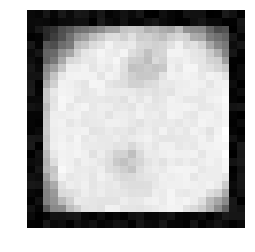

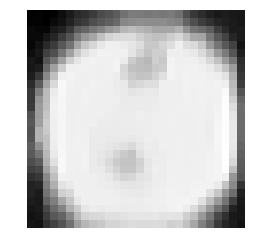

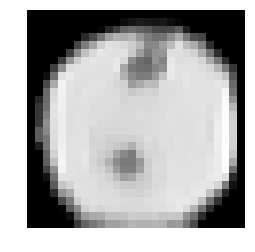

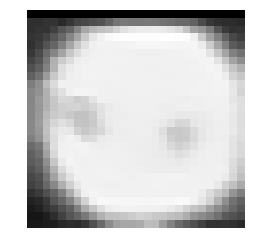

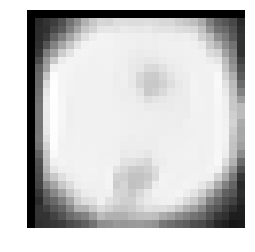

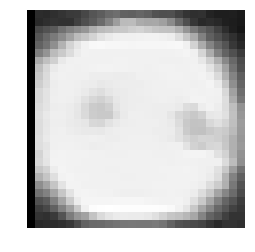

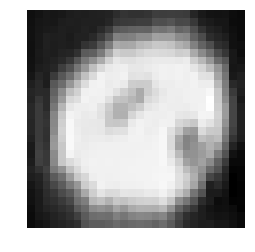

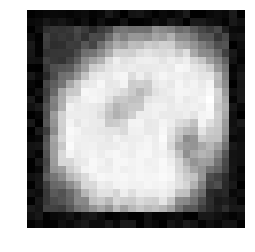

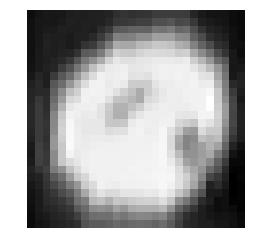

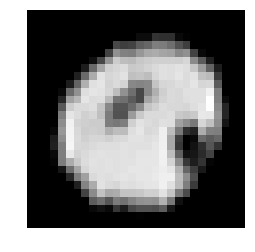

In [12]:
for i in range(90000, 90010):
    view(X[i])
    print(image_class_names[y[i]])

In [13]:
print(X.shape, y.shape)
print(set(y))
print(image_class_names[1])

((1791167, 28, 28), (1791167,))
set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])
Leaf


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=4)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
#del X
#del y

((1432933, 28, 28), (1432933,), (358234, 28, 28), (358234,))


In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

Using TensorFlow backend.


In [17]:
Y_train = np_utils.to_categorical(y_train, len(set(y_train)))
Y_test = np_utils.to_categorical(y_test, len(set(y_train)))

In [18]:
img_rows = 28
img_cols = 28

if K.image_dim_ordering() == 'th':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

X_train.shape

(1432933, 28, 28, 1)

In [19]:
# convert data to float32 and normalize from 0-1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [20]:
model = Sequential()
# input layer
#model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(1,28,28))) # if theano backend
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(65, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
model.fit(X_train, Y_train, batch_size=32, epochs=3, verbose=1)

Epoch 1/3
1432933/1432933 [==============================] - 1186s - loss: 0.5664 - acc: 0.8354  
Epoch 2/3
1432933/1432933 [==============================] - 1183s - loss: 0.5282 - acc: 0.8473  
Epoch 3/3
1432933/1432933 [==============================] - 1175s - loss: 0.5007 - acc: 0.8558  


In [23]:
model.save('model.h5')

In [21]:
from keras.models import load_model
model = load_model('model.h5')

In [24]:
score = model.evaluate(X_test, Y_test) #, verbose=0
score

358234/358234 [==============================] - 76s    


[0.16035631975736497, 0.96224255654358459]

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

pc = model.predict_classes(X_test)

358080/358234 [============================>.] - ETA: 0s

In [26]:
confusion_matrix(np.argmax(Y_test,axis=1), pc)

array([[5290,    0,    1, ...,    0,    0,    0],
       [   0, 5507,    0, ...,    0,    0,    4],
       [   0,    0, 5411, ...,    7,    1,    4],
       ..., 
       [   0,    0,    0, ..., 5440,    0,    0],
       [   0,    0,    0, ...,    4, 5538,    3],
       [   0,    0,    1, ...,    7,   10, 5365]])

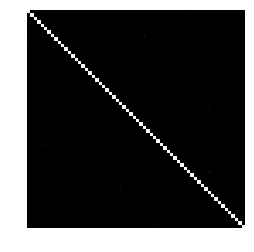

In [27]:
view(confusion_matrix(np.argmax(Y_test,axis=1), pc))

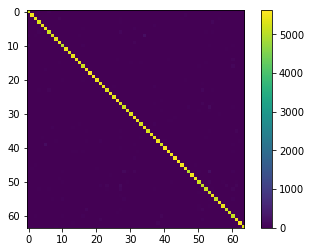

In [28]:
plt.figure()
plt.imshow(confusion_matrix(np.argmax(Y_test,axis=1), pc))
plt.colorbar()

21
1


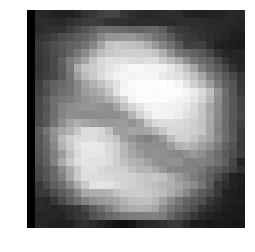

In [29]:
n = 1418
print(pc[n])
view(X_test[n].reshape(1, 28, 28)[0])
print(image_class_names[pc[n]])

31
CircleCross


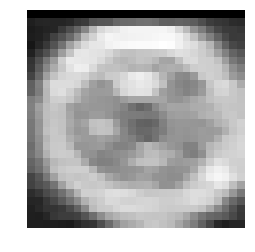

In [30]:
n = 30
print(pc[n])
view(X_test[n].reshape(1, 28, 28)[0])
print(image_class_names[pc[n]])

In [31]:
print(image_class_names)

{0: 'HollowArrow', 1: 'Leaf', 2: 'BB', 3: 'Note1', 4: 'DD', 5: 'Peace', 6: 'Question', 7: 'Pillars', 8: 'KK', 9: 'HH', 10: 'Ampersand', 11: 'JJ', 12: 'Notes2', 13: 'Plant', 14: 'Triangle', 15: 'Power', 16: 'Ankh', 17: 'TT', 18: 'Trident', 19: 'Asterisk', 20: 'Lines3', 21: '1', 22: '0', 23: '3', 24: '2', 25: '5', 26: '4', 27: '7', 28: '6', 29: '8', 30: 'Omega', 31: 'CircleCross', 32: 'AA', 33: 'Circle_Line', 34: 'Radioactive', 35: 'EE', 36: 'PP', 37: 'GG', 38: 'XX', 39: 'Plane', 40: 'ZZ', 41: 'Necklace', 42: 'Umbrella', 43: 'Dot', 44: 'Halfcircle', 45: 'a', 46: 'Heart', 47: 'b', 48: 'e', 49: 'RR', 50: 'g', 51: 'f', 52: 'UU', 53: 'h', 54: 'Queen', 55: 'Tadpole', 56: 'n', 57: 'SS', 58: 'r', 59: 'ArrowLine', 60: 'w', 61: 'y', 62: 'Scissors', 63: 'MM'}


In [32]:
pp = model.predict_proba(X_test)

358048/358234 [============================>.] - ETA: 0s

In [33]:
pp[0]

array([  1.13466541e-07,   5.71694272e-06,   1.52812207e-09,
         2.56104894e-11,   7.11635322e-37,   3.97900463e-11,
         1.33363681e-10,   9.56070512e-09,   3.88419765e-12,
         2.88494612e-22,   1.08176051e-02,   3.62970459e-10,
         1.47095469e-09,   5.43742130e-18,   2.37947884e-10,
         5.21950058e-22,   2.63637285e-05,   1.27034439e-09,
         9.58900080e-15,   1.19843644e-18,   5.60497648e-10,
         2.75322432e-10,   4.64824203e-28,   1.41974056e-07,
         9.63767713e-20,   2.34742511e-05,   3.41865691e-09,
         5.79296264e-11,   1.46558846e-03,   3.19310811e-06,
         6.37310080e-29,   2.54922041e-15,   5.86767790e-08,
         9.47680645e-17,   4.57925853e-06,   5.25069423e-04,
         6.47975118e-10,   1.75710299e-25,   9.24282373e-10,
         2.53768950e-11,   5.09506497e-17,   1.14199516e-07,
         4.69049752e-07,   4.25156411e-19,   5.38049886e-16,
         7.06760141e-15,   2.17689688e-09,   4.14171927e-02,
         3.64105286e-19,

In [34]:
print(np.argmax(pp[0]))
print(np.amax(pp[0]))

53
0.922594


In [75]:
d = '/Users/jacksimpson/Data/beeunique/output/Caffeine_Unique_Tags/2017-02-14_22-22-15/6/'

images = []
for image_file in glob.glob(d + '*.png'):
    image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
    kernel_size = 3
    sig = 1.0
    th = 0.2
    lm = 3.0
    gm = 1.5
    ps = 0
    kernel = cv2.getGaborKernel((kernel_size, kernel_size), sig, th, lm, gm, ps)
    image = cv2.filter2D(image, cv2.CV_32F, kernel)
    
    
    images.append(image)
    
images_array = np.array(images)
images_array = images_array.reshape(images_array.shape[0], img_rows, img_cols, 1)
images_array /=255

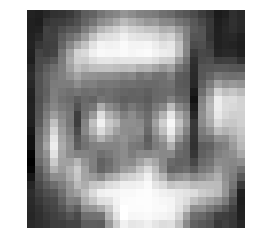

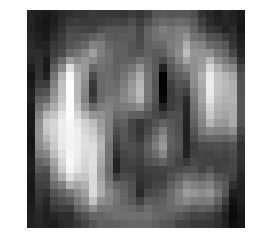

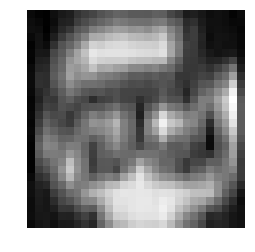

In [76]:
view(images[0])
view(images[1])
view(images[2])

In [77]:
pc = model.predict_classes(images_array)
pp = model.predict_proba(images_array)

1760/1905 [==========================>...] - ETA: 0s

In [78]:
pc

array([49, 45,  2, ..., 45, 45, 45])

In [79]:
batches = []
num_batches = 0
num_to_create_new_batch = 30

for i, p in enumerate(pc):
    if i % num_to_create_new_batch == 0:
        batches.append({})
    if image_class_names[pc[p]] in batches[-1].keys():
        batches[-1][image_class_names[pc[p]]] += 1
    else:
        batches[-1][image_class_names[pc[p]]] = 1
    #print(image_class_names[pc[p]], np.amax(pp[i]))
    
batches

[{'BB': 15, 'RR': 4, 'a': 11},
 {'BB': 12, 'RR': 7, 'a': 11},
 {'BB': 12, 'RR': 4, 'a': 14},
 {'BB': 14, 'RR': 1, 'a': 15},
 {'BB': 13, 'RR': 1, 'a': 16},
 {'BB': 16, 'RR': 9, 'a': 5},
 {'BB': 15, 'RR': 1, 'a': 14},
 {'BB': 17, 'RR': 5, 'a': 8},
 {'BB': 11, 'RR': 4, 'a': 15},
 {'BB': 13, 'RR': 3, 'a': 14},
 {'BB': 12, 'RR': 6, 'a': 12},
 {'BB': 12, 'RR': 6, 'a': 12},
 {'BB': 15, 'RR': 1, 'a': 14},
 {'BB': 15, 'RR': 3, 'a': 12},
 {'BB': 13, 'RR': 3, 'a': 14},
 {'BB': 19, 'RR': 3, 'a': 8},
 {'BB': 11, 'RR': 2, 'a': 17},
 {'BB': 14, 'RR': 1, 'a': 15},
 {'BB': 17, 'RR': 2, 'a': 11},
 {'BB': 13, 'RR': 4, 'a': 13},
 {'BB': 13, 'RR': 2, 'a': 15},
 {'BB': 9, 'RR': 4, 'a': 17},
 {'BB': 15, 'RR': 6, 'a': 9},
 {'BB': 12, 'RR': 4, 'a': 14},
 {'BB': 16, 'RR': 2, 'a': 12},
 {'BB': 13, 'RR': 6, 'a': 11},
 {'BB': 10, 'RR': 8, 'a': 12},
 {'BB': 12, 'RR': 4, 'a': 14},
 {'BB': 10, 'RR': 3, 'a': 17},
 {'BB': 14, 'RR': 3, 'a': 13},
 {'BB': 9, 'RR': 2, 'a': 19},
 {'BB': 16, 'RR': 3, 'a': 11},
 {'BB': 16, 'R

In [74]:
image_class_names

{0: 'HollowArrow',
 1: 'Leaf',
 2: 'BB',
 3: 'Note1',
 4: 'DD',
 5: 'Peace',
 6: 'Question',
 7: 'Pillars',
 8: 'KK',
 9: 'HH',
 10: 'Ampersand',
 11: 'JJ',
 12: 'Notes2',
 13: 'Plant',
 14: 'Triangle',
 15: 'Power',
 16: 'Ankh',
 17: 'TT',
 18: 'Trident',
 19: 'Asterisk',
 20: 'Lines3',
 21: '1',
 22: '0',
 23: '3',
 24: '2',
 25: '5',
 26: '4',
 27: '7',
 28: '6',
 29: '8',
 30: 'Omega',
 31: 'CircleCross',
 32: 'AA',
 33: 'Circle_Line',
 34: 'Radioactive',
 35: 'EE',
 36: 'PP',
 37: 'GG',
 38: 'XX',
 39: 'Plane',
 40: 'ZZ',
 41: 'Necklace',
 42: 'Umbrella',
 43: 'Dot',
 44: 'Halfcircle',
 45: 'a',
 46: 'Heart',
 47: 'b',
 48: 'e',
 49: 'RR',
 50: 'g',
 51: 'f',
 52: 'UU',
 53: 'h',
 54: 'Queen',
 55: 'Tadpole',
 56: 'n',
 57: 'SS',
 58: 'r',
 59: 'ArrowLine',
 60: 'w',
 61: 'y',
 62: 'Scissors',
 63: 'MM'}